In [ ]:
# Importation des librairies

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import plotly.offline as po
import plotly.graph_objs as go       
##

import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [55]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Importation des données

In [63]:
dataset = pd.read_csv('C:\\Users\\Malak\\Desktop\\dm/StudentsPerformance.csv')

In [ ]:
#Compréhension des données

In [43]:
dataset.shape

(1000, 16)

In [128]:
print('Number of rows:', dataset.shape[0])
print('Number of columns:', dataset.shape[1])

Number of rows: 1000
Number of columns: 16


In [134]:

# read the data file into a pandas dataframe


# get the number of variables
num_variables = len(dataset.columns)

# get the number of cells
num_cells = dataset.size

# get the number of rows
num_rows = len(dataset.index)

# get the variable types
variable_types = dataset.dtypes

# print the results
print(f"Number of variables: {num_variables}")
print(f"Number of cells: {num_cells}")
print(f"Number of rows: {num_rows}")
print(f"Variable types:\n{variable_types}")

Number of variables: 16
Number of cells: 16000
Number of rows: 1000
Variable types:
StudentID                       int64
FirstName                      object
lastName                       object
email                          object
gender                         object
Age                             int64
grade                          object
parental level of education    object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
score                           int64
speciality                     object
experience                       bool
skills                         object
dtype: object


In [17]:
dataset.columns

Index(['StudentID', 'FirstName', 'lastName', 'email', 'gender', 'Age', 'grade',
       'parental level of education', 'test preparation course', 'math score',
       'reading score', 'writing score', 'score', 'speciality', 'experience',
       'skills'],
      dtype='object')

In [18]:
dataset.head()

,StudentID,FirstName,lastName,email,gender,Age,grade,parental level of education,test preparation course,math score,reading score,writing score,score,speciality,experience,skills
0,1,Jeri,Drezzer,jdrezzer0@newsvine.com,Female,31,group B,bachelor's degree,none,11,11,6,72,Informatique,True,EIM
1,2,Licha,Lindgren,llindgren1@cbc.ca,male,28,group C,some college,completed,14,14,17,69,Informatique,False,cGMP practices
2,3,Dorothy,Leglise,dleglise2@mozilla.com,Female,28,group B,master's degree,none,14,15,15,90,Mecanique,False,Event Planning
3,4,Lyda,Lippiello,llippiello3@cloudflare.com,Female,23,group A,associate's degree,none,15,6,15,47,Mecanique,True,Mecanique
4,5,Cchaddie,Orpen,corpen4@surveymonkey.com,Male,30,group C,some college,none,15,13,20,76,Mecanique,False,Solution Architecture


In [19]:
dataset.describe()

,StudentID,Age,math score,reading score,writing score,score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,484.440000,26.296000,11.585000,11.841000,11.72600,66.08900
std,294.199354,5.149845,5.297248,5.200651,5.22362,15.16308
min,1.000000,18.000000,0.000000,1.000000,1.00000,0.00000
25%,217.750000,22.000000,6.000000,6.000000,6.00000,57.00000
50%,480.500000,26.000000,14.000000,14.000000,14.00000,66.00000
75%,748.250000,31.000000,15.000000,15.000000,15.00000,77.00000
max,1000.000000,35.000000,20.000000,20.000000,20.00000,100.00000


In [8]:
dataset.describe(include = 'all')

,StudentID,FirstName,lastName,email,gender,Age,grade,parental level of education,test preparation course,math score,reading score,writing score,score,speciality,experience,skills
count,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000.00000,1000,1000,1000
unique,NaN,945,991,1000,4,NaN,5,6,2,NaN,NaN,NaN,NaN,5,2,927
top,NaN,Carey,Kestell,jdrezzer0@newsvine.com,Male,NaN,group C,some college,none,NaN,NaN,NaN,NaN,Informatique,False,HTRF
freq,NaN,3,2,1,459,NaN,319,226,642,NaN,NaN,NaN,NaN,270,503,5
mean,484.440000,NaN,NaN,NaN,NaN,26.296000,NaN,NaN,NaN,11.585000,11.841000,11.72600,66.08900,NaN,NaN,NaN
std,294.199354,NaN,NaN,NaN,NaN,5.149845,NaN,NaN,NaN,5.297248,5.200651,5.22362,15.16308,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.000000,1.000000,1.00000,0.00000,NaN,NaN,NaN
25%,217.750000,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,6.000000,6.000000,6.00000,57.00000,NaN,NaN,NaN
50%,480.500000,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,14.000000,14.000000,14.00000,66.00000,NaN,NaN,NaN
75%,748.250000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,15.000000,15.000000,15.00000,77.00000,NaN,NaN,NaN


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   StudentID                    1000 non-null   int64 
 1   FirstName                    1000 non-null   object
 2   lastName                     1000 non-null   object
 3   email                        1000 non-null   object
 4   gender                       1000 non-null   object
 5   Age                          1000 non-null   int64 
 6   grade                        1000 non-null   object
 7   parental level of education  1000 non-null   object
 8   test preparation course      1000 non-null   object
 9   math score                   1000 non-null   int64 
 10  reading score                1000 non-null   int64 
 11  writing score                1000 non-null   int64 
 12  score                        1000 non-null   int64 
 13  speciality                   1000 

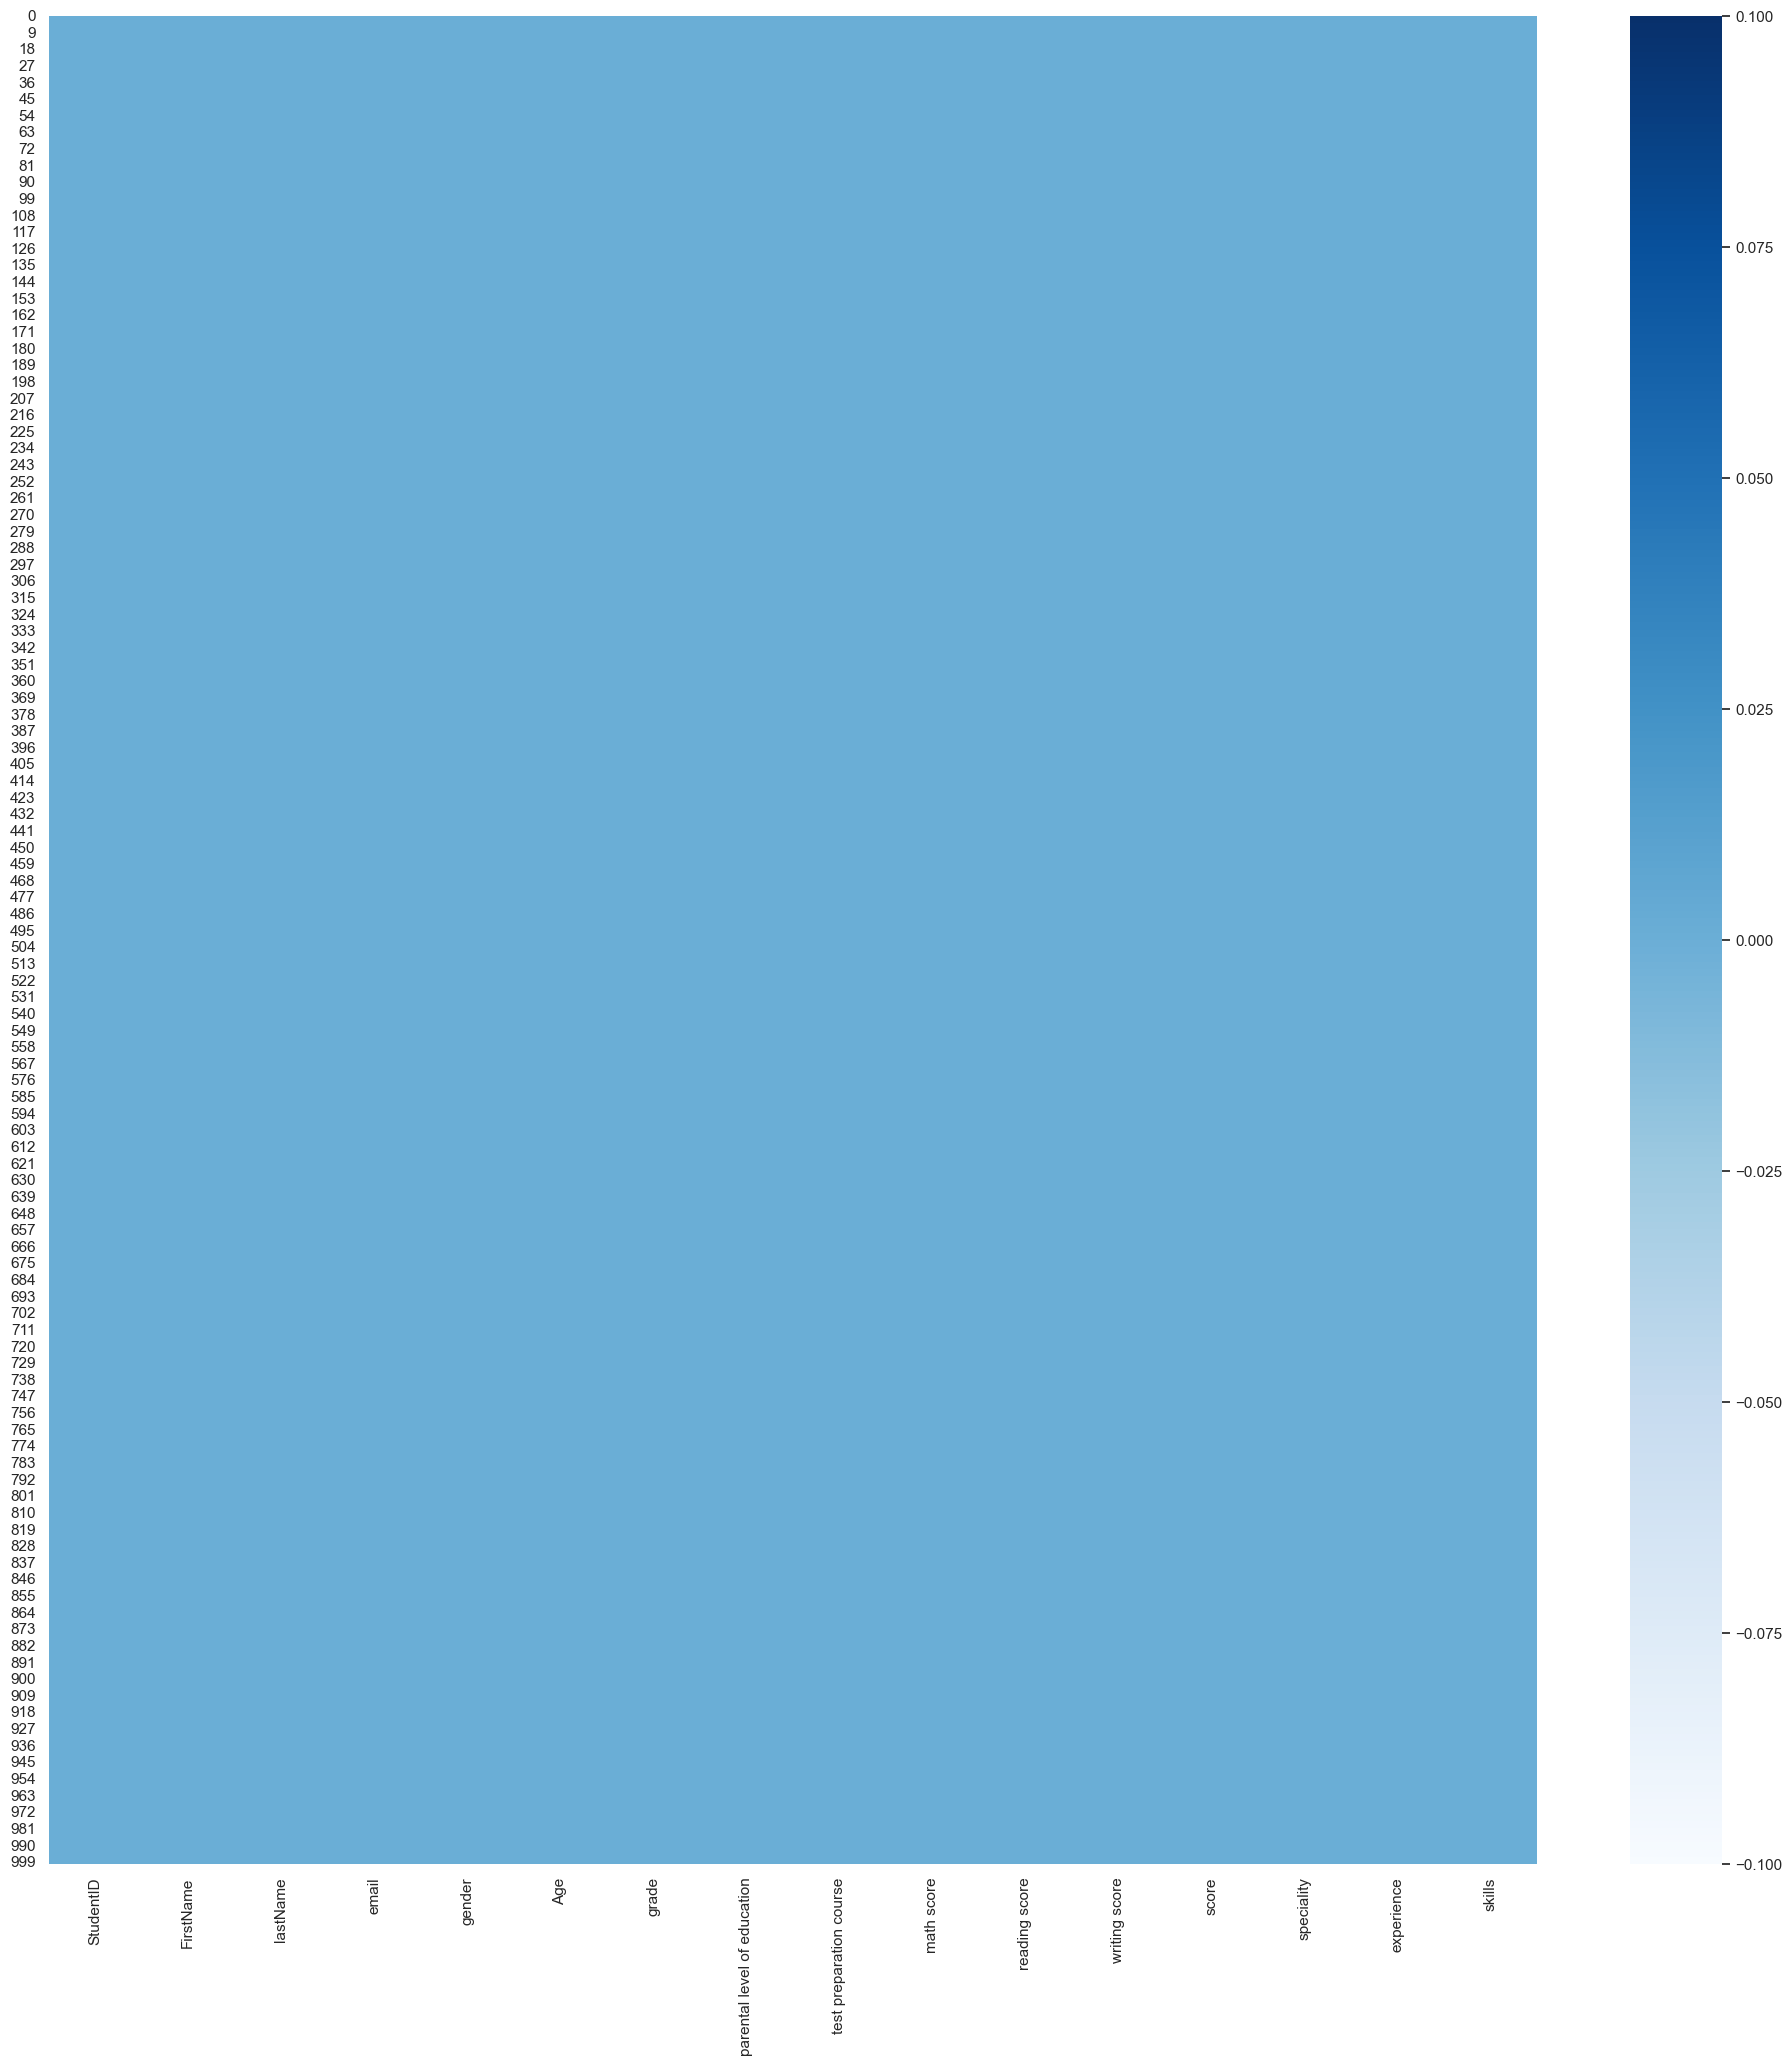

In [141]:
sns.heatmap(dataset.isnull(), cmap='Blues')
plt.show()

In [16]:
dataset.describe(include=['object'])

,FirstName,lastName,email,gender,grade,parental level of education,test preparation course,speciality,skills
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,945,991,1000,4,5,6,2,5,927
top,Carey,Kestell,jdrezzer0@newsvine.com,Male,group C,some college,none,Informatique,HTRF
freq,3,2,1,459,319,226,642,270,5


In [18]:
cat_features = dataset.select_dtypes(include=['object','bool']).columns.tolist()
cat_features

['FirstName',
 'lastName',
 'email',
 'gender',
 'grade',
 'parental level of education',
 'test preparation course',
 'speciality',
 'experience',
 'skills']

In [81]:
num_features = dataset.select_dtypes(exclude=['object','bool']).columns.tolist()
num_features

['StudentID', 'Age', 'math score', 'reading score', 'writing score', 'score']

In [64]:

plot_by_class_labels = dataset["grade"].value_counts().keys().tolist()

plot_by_class_values = dataset["grade"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_class_labels,
           values = plot_by_class_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 100,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "grade ",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [60]:
print(dataset["speciality"].unique())

['Informatique' 'Mecanique' 'Mecanique ' 'Electrique  ']


In [65]:

plot_by_class_labels = dataset["speciality"].value_counts().keys().tolist()

plot_by_class_values = dataset["speciality"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_class_labels,
           values = plot_by_class_values,
           marker = dict( line = dict(color = "white",
                                     width =  1.5)),
           rotation = 100,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "speciality",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

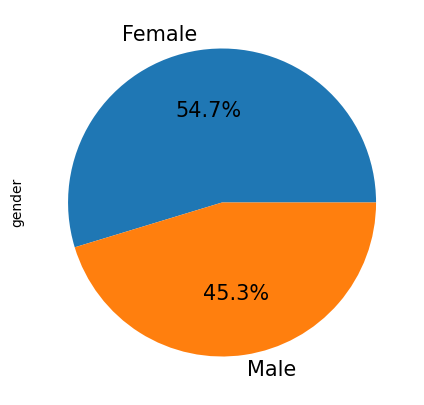

In [66]:
#Présentation du pourcentage selon grade. 

plt.figure(figsize=(7,5))
dataset['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":15})
plt.show()

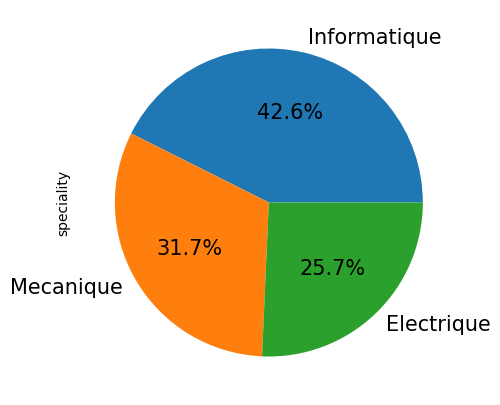

In [68]:
#Présentation du pourcentage selon speciality. 

plt.figure(figsize=(7,5))
dataset['speciality'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":15})
plt.show()

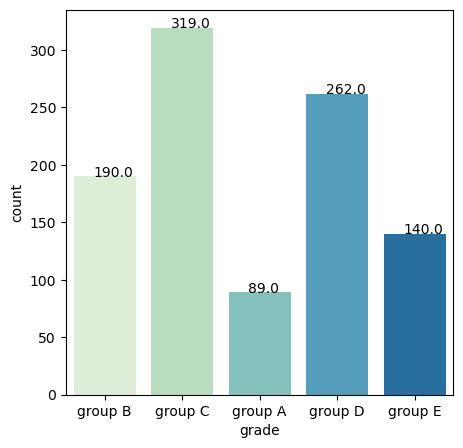

In [25]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = dataset['grade'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

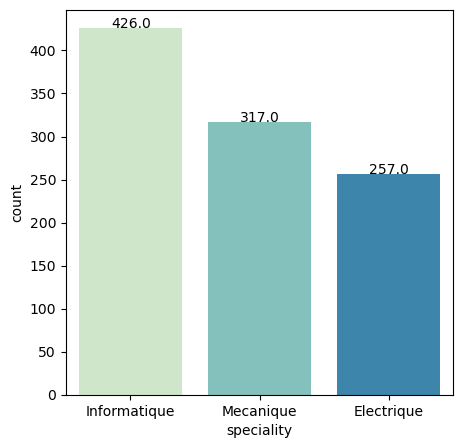

In [69]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = dataset['speciality'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [70]:
dataset['grade'].value_counts(normalize = True).to_frame()

,grade
group C,0.319
group D,0.262
group B,0.190
group E,0.140
group A,0.089


In [71]:
dataset['speciality'].value_counts(normalize = True).to_frame()

,speciality
Informatique,0.426
Mecanique,0.317
Electrique,0.257


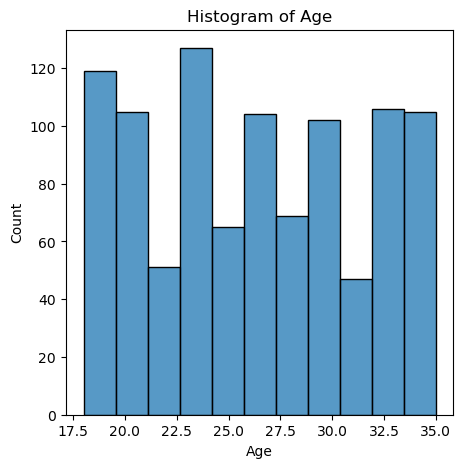

In [72]:
plt.figure(figsize=(5, 5))
sns.histplot(data=dataset, x = "Age")
plt.title('Histogram of Age')
plt.show()

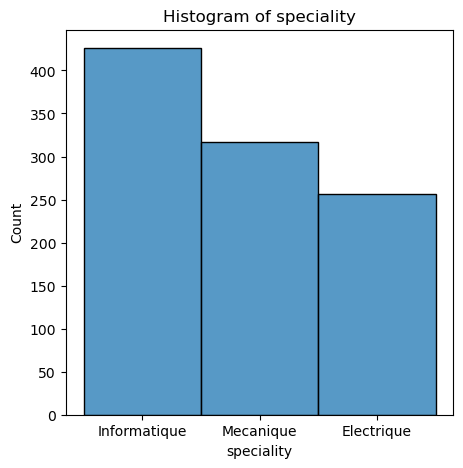

In [73]:
plt.figure(figsize=(5, 5))
sns.histplot(data=dataset, x = "speciality")
plt.title('Histogram of speciality')
plt.show()

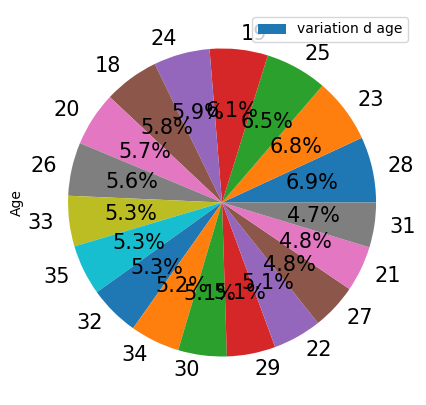

In [75]:
#Présentation du pourcentage selon age. 

plt.figure(figsize=(7,5))
dataset['Age'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":15})
plt.legend(labels=['variation d age'])
plt.show()

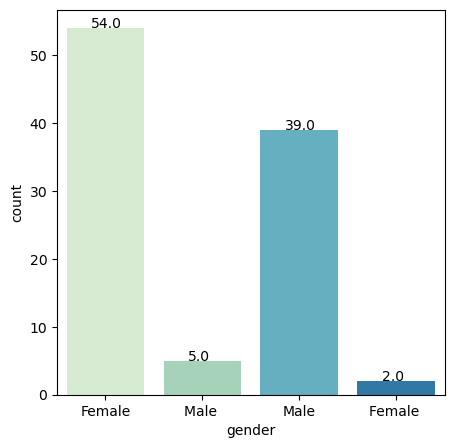

In [116]:
plt.figure(figsize=(5, 5))
#x = dataset['Mobility_Goal_City'].head(500)
ax = sns.countplot(x = dataset['gender'].head(100), palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

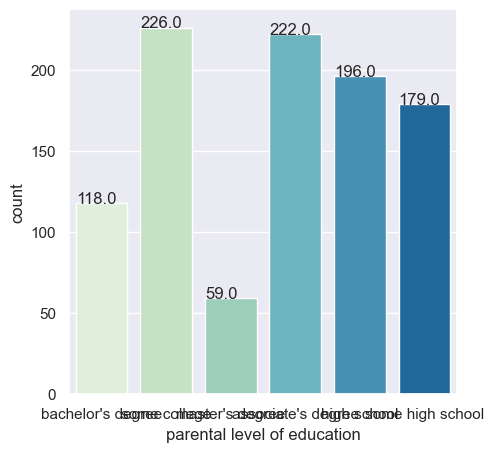

In [161]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = dataset['parental level of education'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

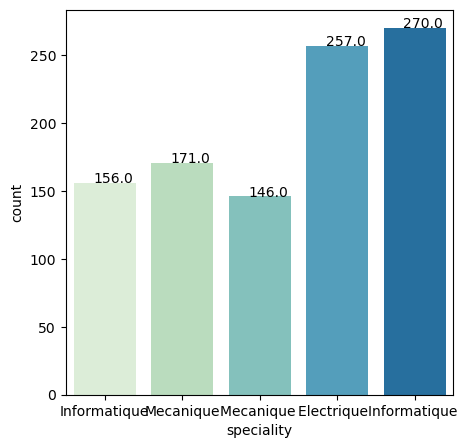

In [119]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = dataset['speciality'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

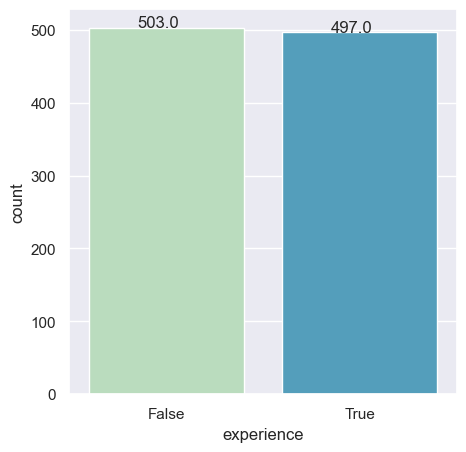

In [162]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = dataset['experience'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

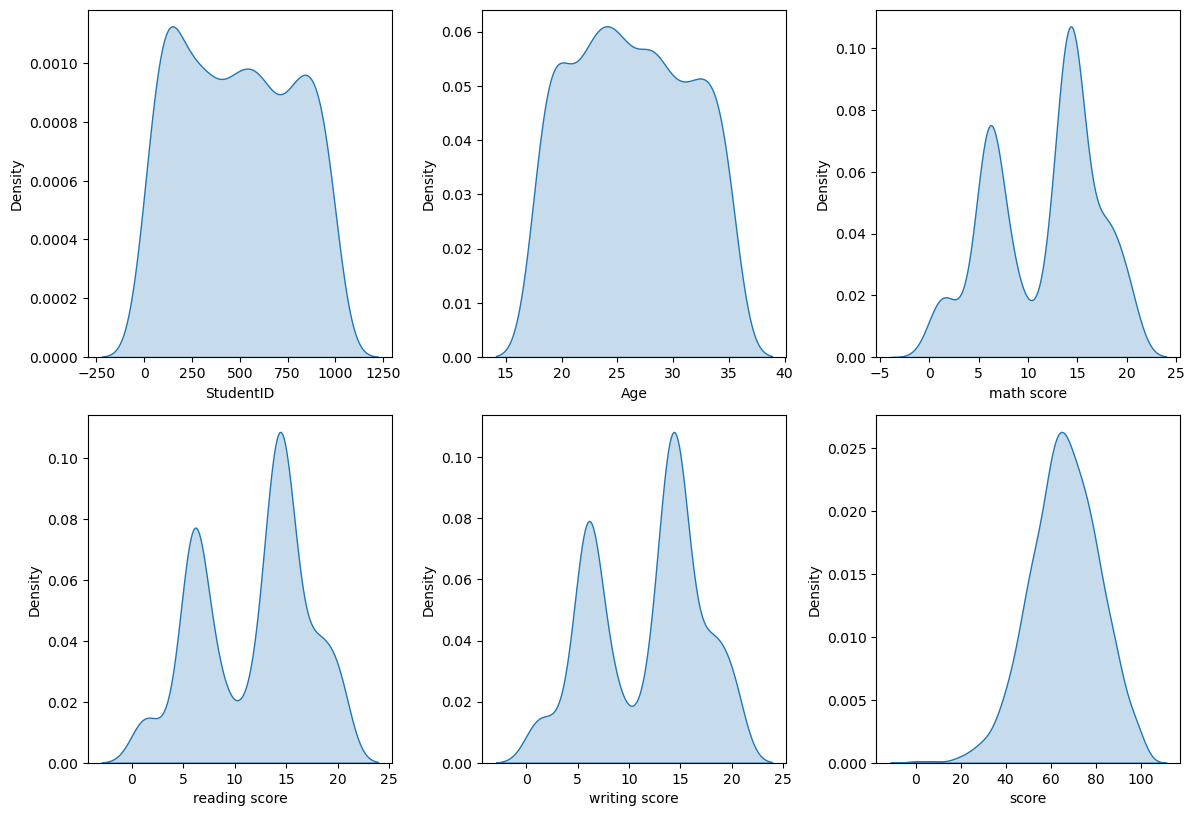

In [82]:
#distribution des valeurs numerique
cols = 3
rows = 5
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot(rows,cols,i+1,)
    sns.kdeplot(data=dataset, x = col, ax = ax, fill=True)
    
fig.tight_layout()  
plt.show()

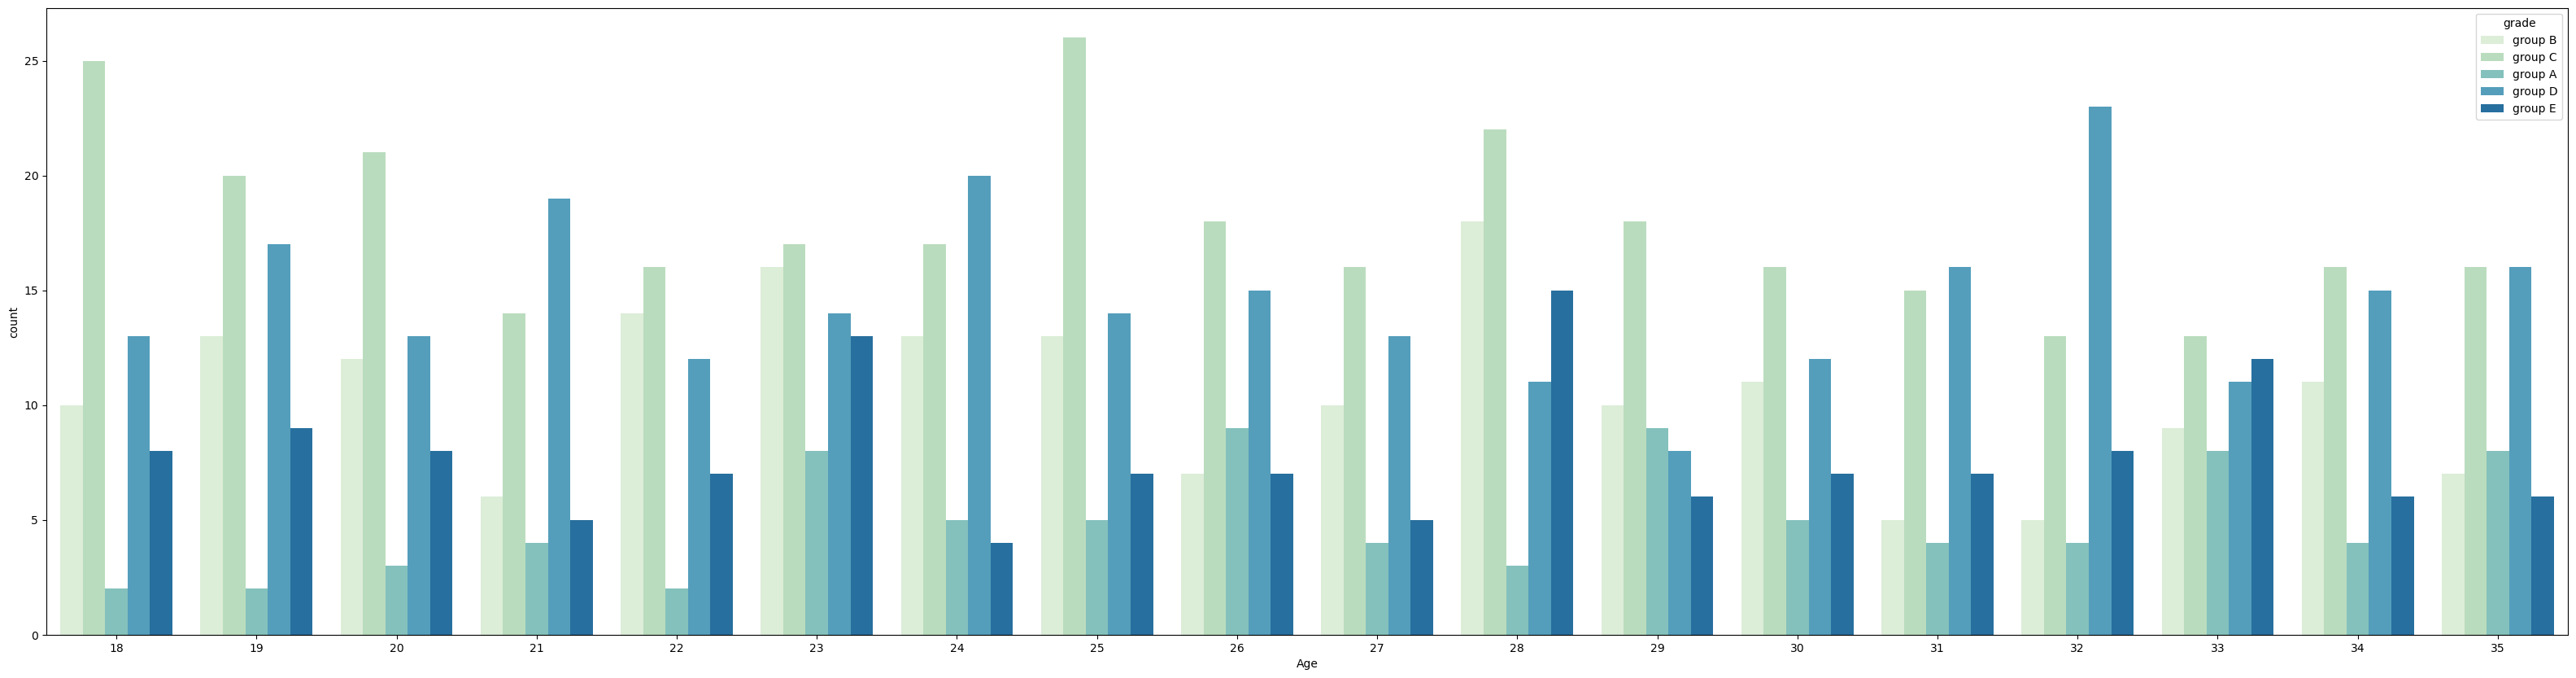

In [83]:
plt.figure(figsize=(40, 10))   
ax = sns.countplot(data=dataset, x = 'Age',  palette="GnBu", hue='grade')
fig.tight_layout()  
plt.show()

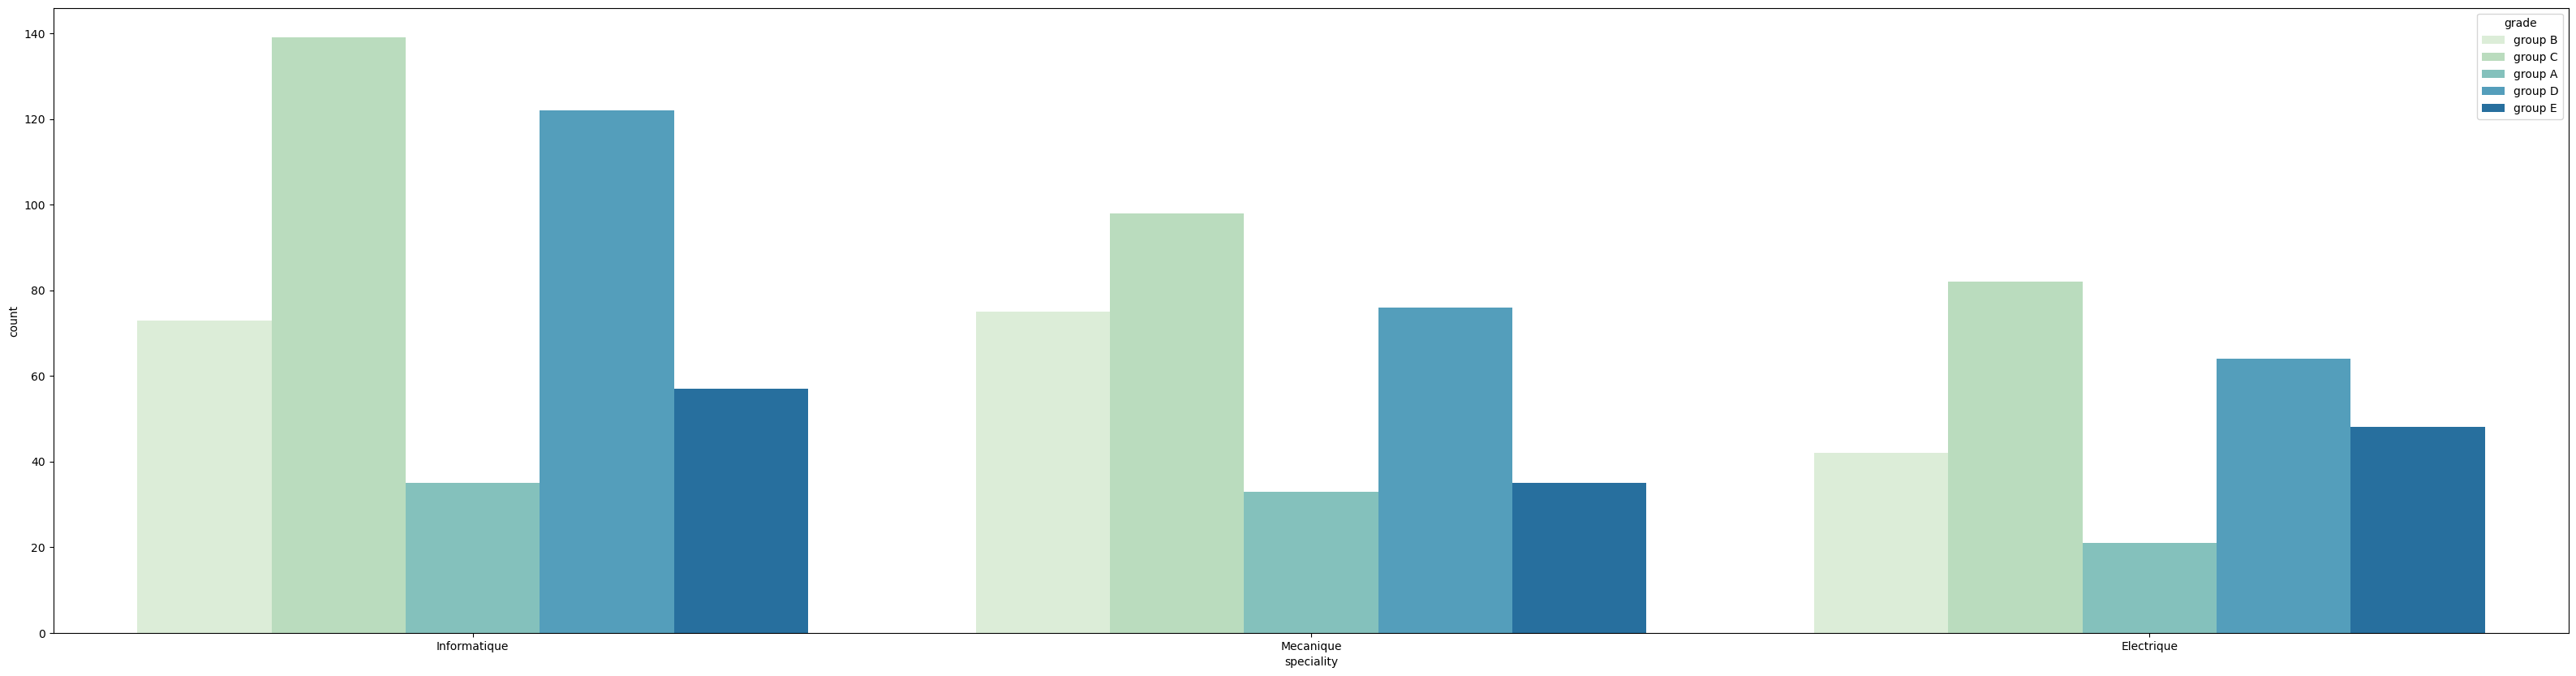

In [84]:
plt.figure(figsize=(40, 10))   
ax = sns.countplot(data=dataset, x = 'speciality',  palette="GnBu", hue='grade')
fig.tight_layout()  
plt.show()

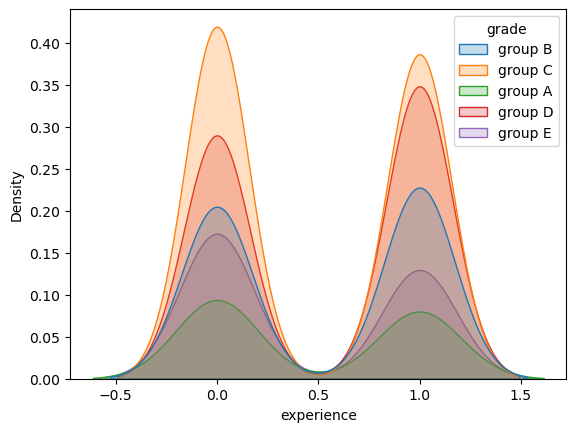

In [85]:
plt.figure() #hue juste coloration 
sns.kdeplot(data=dataset, x = "experience", hue="grade", fill=True)
plt.show()

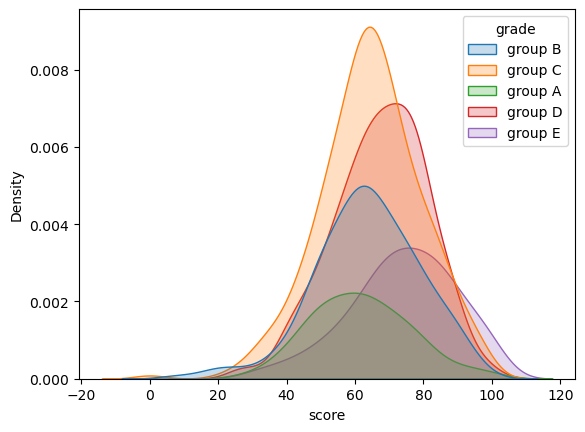

In [86]:
plt.figure() #hue juste coloration 
sns.kdeplot(data=dataset, x = "score", hue="grade", fill=True)
plt.show()

In [87]:
#value_counts() we will count how many samples we have in each category of the column 'class'
dataset['grade'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: grade, dtype: int64

In [126]:
dataset['Age'].value_counts()

28    69
23    68
25    65
19    61
24    59
18    58
20    57
26    56
33    53
35    53
32    53
34    52
30    51
29    51
22    51
27    48
21    48
31    47
Name: Age, dtype: int64

In [88]:
# unique() will show us the distinct value of the column 
print(dataset.Age.unique())

[31 28 23 30 18 25 24 20 29 27 19 22 21 35 32 34 33 26]


In [89]:
# unique() will show us the distinct value of the column 
print(dataset.speciality.unique())

['Informatique' 'Mecanique' 'Electrique']


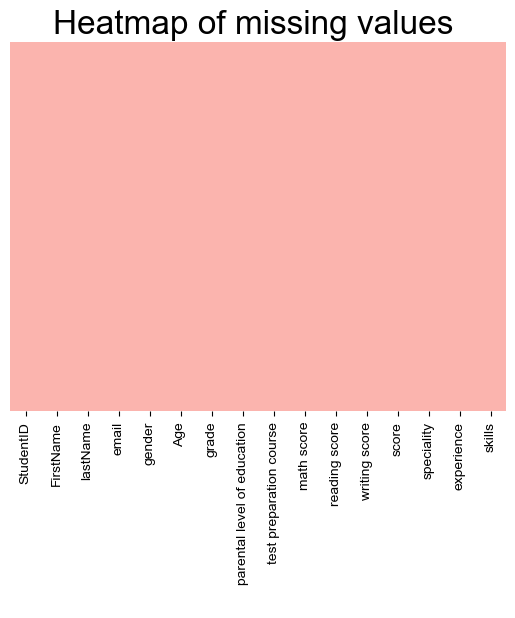

In [90]:
# searching null values
fig=sns.heatmap( yticklabels=False, data=dataset.isnull(), cbar=False, cmap="Pastel1",center=0.42)

fig.set_title('Heatmap of missing values ',fontdict= { 'fontsize': 24})
sns.set(rc={'figure.figsize':(24,24)})
sns.set_theme()

<Figure size 1000x1000 with 0 Axes>

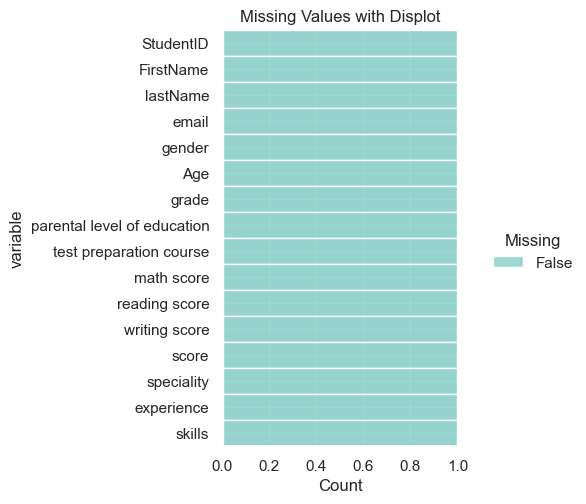

In [144]:
plt.figure(figsize=(10,10))
sns.displot(
    data=dataset.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "GnBu"
)
plt.title('Missing Values with Displot')
plt.show()

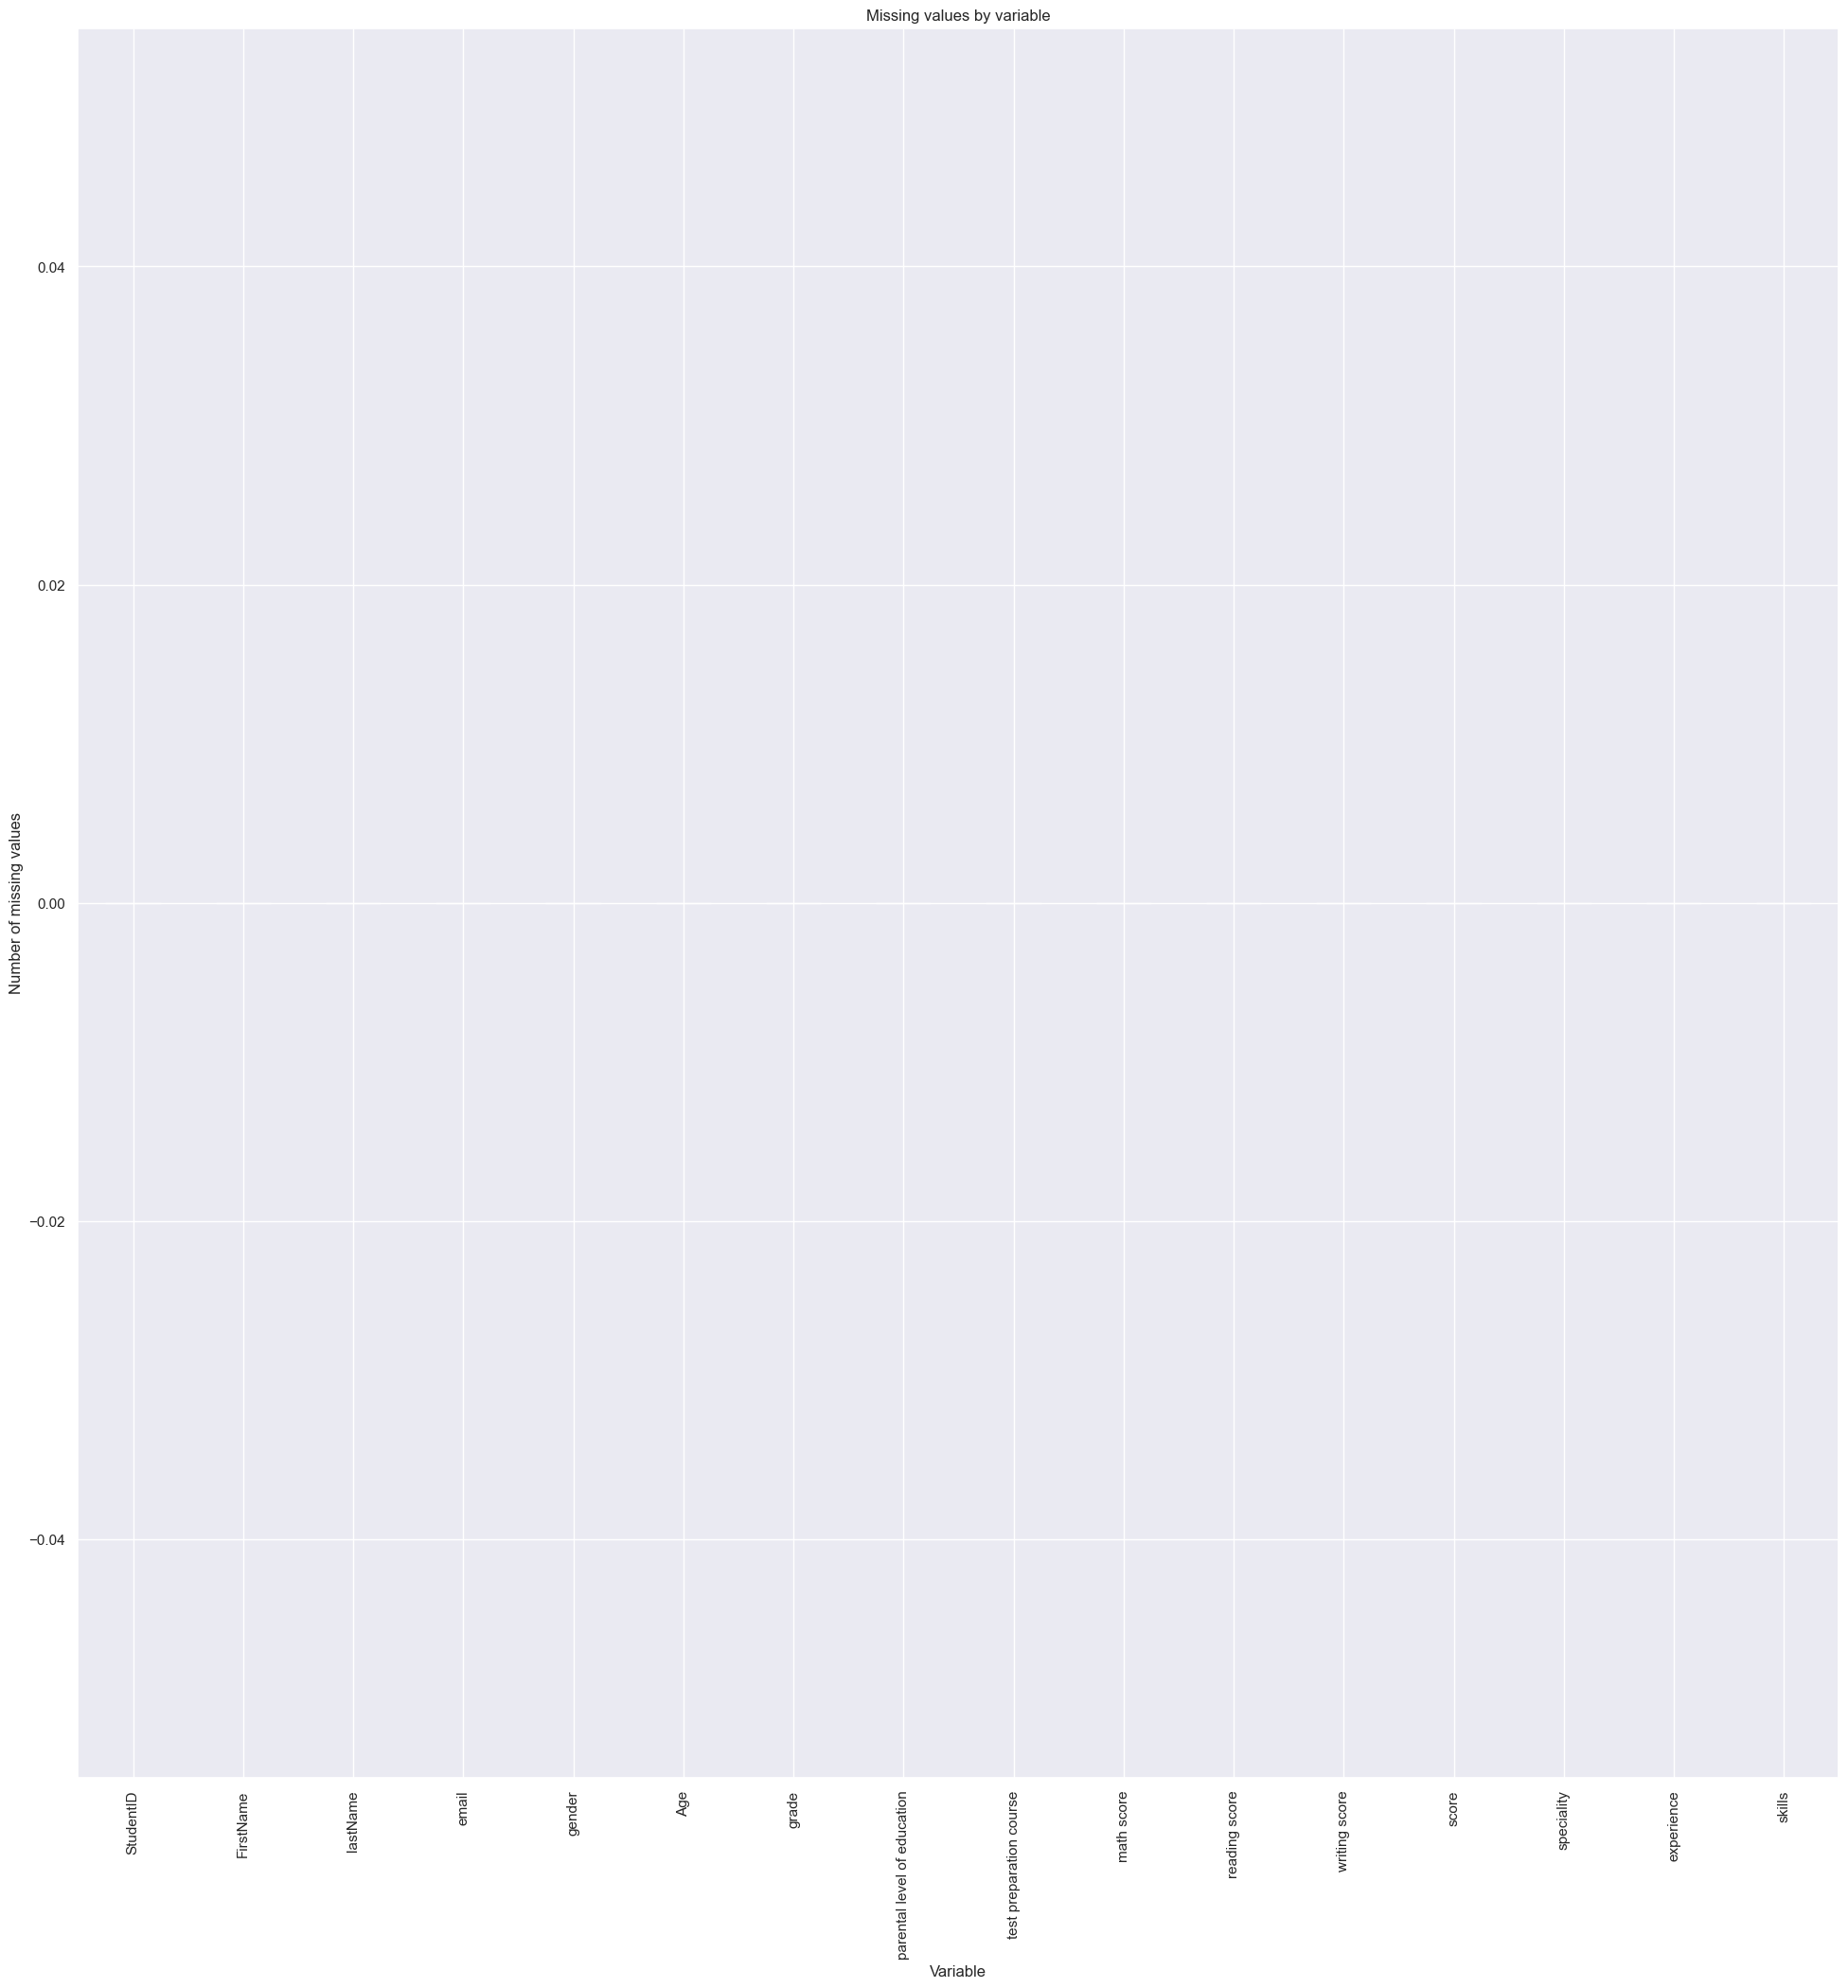

In [146]:

# calculate the number of missing values for each variable
missing_values = dataset.isnull().sum()

# create a bar chart to visualize the missing values for each variable
missing_values.plot(kind='bar')
plt.xlabel('Variable')
plt.ylabel('Number of missing values')
plt.title('Missing values by variable')
plt.show()

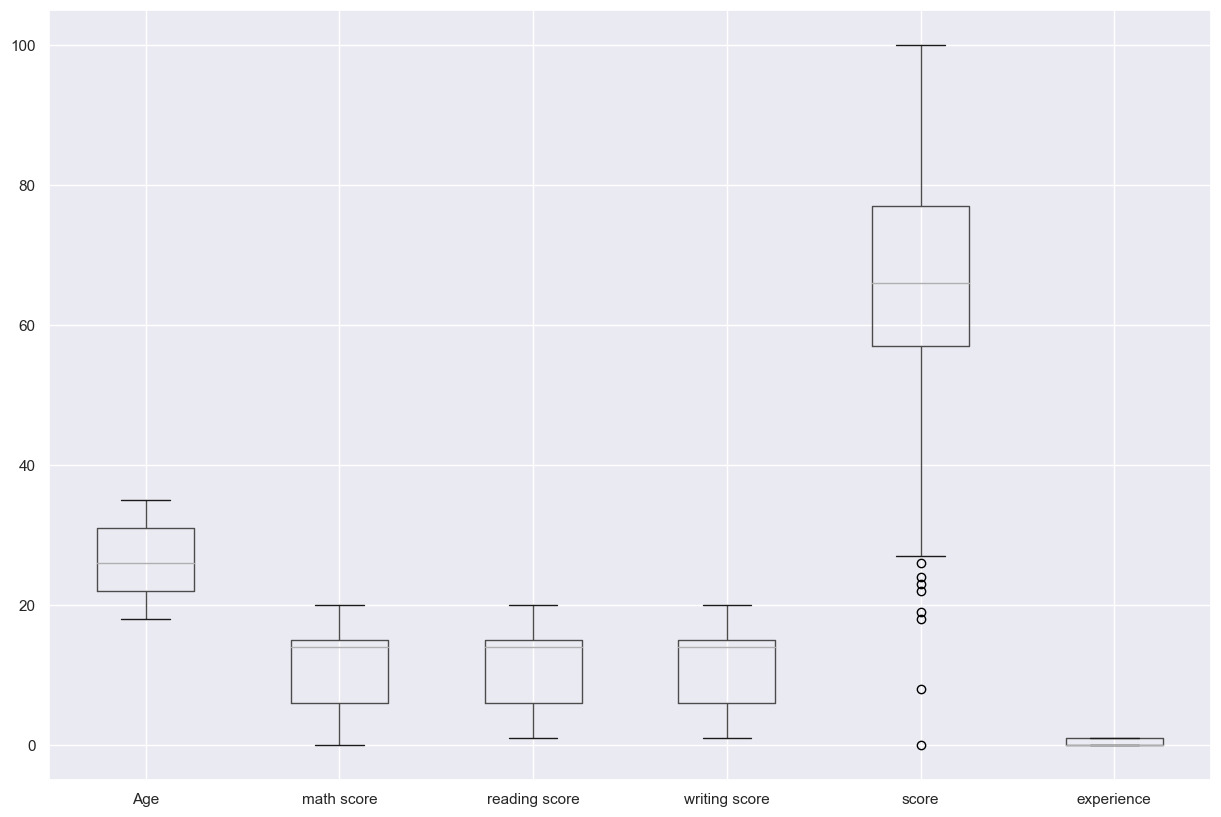

In [93]:
dataset.iloc[:,1:].boxplot(figsize=(15,10));

In [171]:
#pd.plotting.scatter_matrix(dataset.iloc[:,1:],figsize=(10,10));

In [94]:
dataset.iloc[:,1:].corr()

C:\Users\Malak\AppData\Local\Temp\ipykernel_12072\2347328421.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,math score,reading score,writing score,score,experience
Age,1.000000,0.024249,-0.032252,-0.006620,0.004072,-0.063379
math score,0.024249,1.000000,0.044620,-0.014604,0.151690,-0.021058
reading score,-0.032252,0.044620,1.000000,0.103925,0.094773,0.014630
writing score,-0.006620,-0.014604,0.103925,1.000000,0.084868,-0.024066
score,0.004072,0.151690,0.094773,0.084868,1.000000,0.048005
experience,-0.063379,-0.021058,0.014630,-0.024066,0.048005,1.000000


C:\Users\Malak\AppData\Local\Temp\ipykernel_12072\3417280902.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



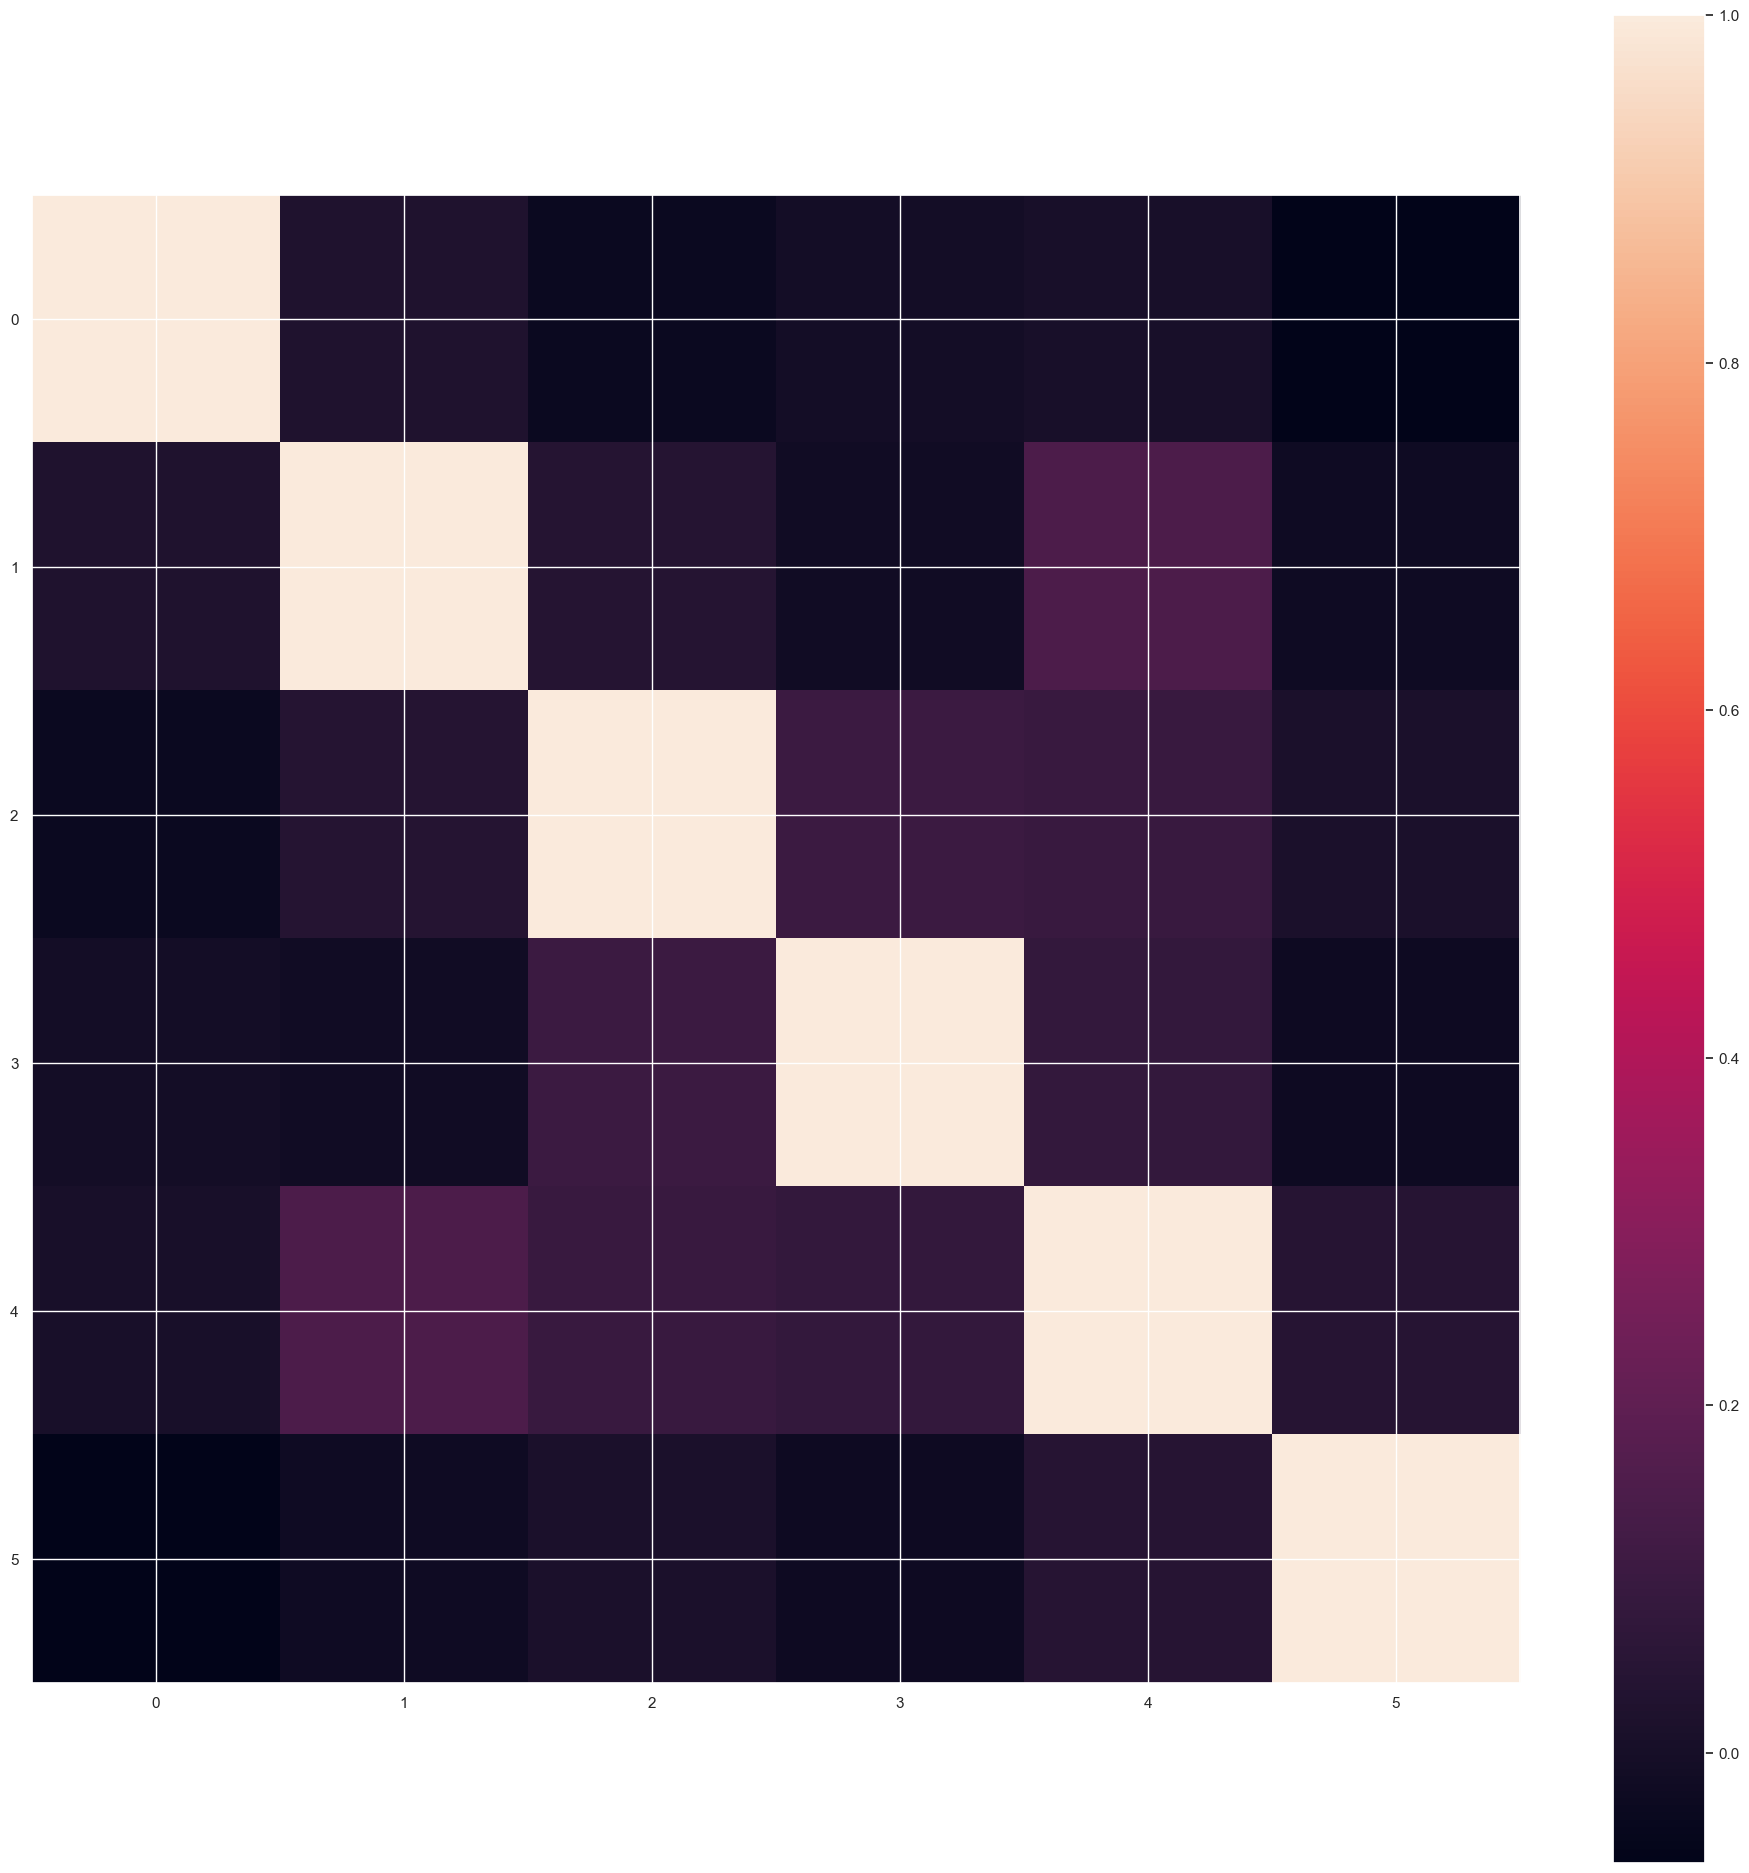

In [95]:
plt.imshow(dataset.iloc[:,1:].corr());
plt.colorbar();

In [ ]:
#Load and check Data

In [96]:
dataset.isnull().sum()

StudentID                      0
FirstName                      0
lastName                       0
email                          0
gender                         0
Age                            0
grade                          0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score                          0
speciality                     0
experience                     0
skills                         0
dtype: int64

In [98]:
dataset.dtypes

StudentID                       int64
FirstName                      object
lastName                       object
email                          object
gender                         object
Age                             int64
grade                          object
parental level of education    object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
score                           int64
speciality                     object
experience                       bool
skills                         object
dtype: object

In [ ]:
#Descriptive Statistics

In [133]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,1000.0,484.440,294.199354,1.0,217.75,480.5,748.25,1000.0
Age,1000.0,26.296,5.149845,18.0,22.00,26.0,31.00,35.0
math score,1000.0,11.585,5.297248,0.0,6.00,14.0,15.00,20.0
reading score,1000.0,11.841,5.200651,1.0,6.00,14.0,15.00,20.0
writing score,1000.0,11.726,5.223620,1.0,6.00,14.0,15.00,20.0
score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.00,100.0


In [100]:
#Unique values in data
dataset.nunique()

StudentID                       941
FirstName                       945
lastName                        991
email                          1000
gender                            2
Age                              18
grade                             5
parental level of education       6
test preparation course           2
math score                       19
reading score                    17
writing score                    18
score                            81
speciality                        3
experience                        2
skills                          927
dtype: int64

<Axes: title={'center': 'Gender'}, ylabel='gender'>

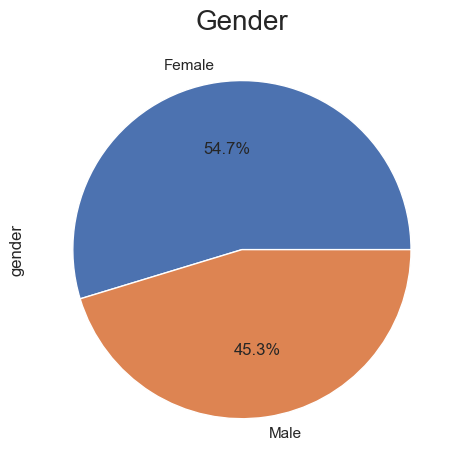

In [101]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
dataset['gender'].value_counts().plot.pie(autopct="%1.1f%%")


<Axes: title={'center': 'Grade'}, ylabel='grade'>

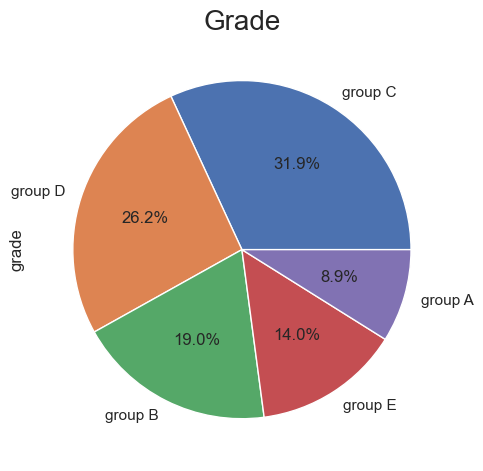

In [102]:
#Percentage Of grade
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(142)
plt.title('Grade',fontsize = 20)
dataset['grade'].value_counts().plot.pie(autopct="%1.1f%%")

In [ ]:
#Analysis


C:\Users\Malak\AppData\Local\Temp\ipykernel_12072\2217383407.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

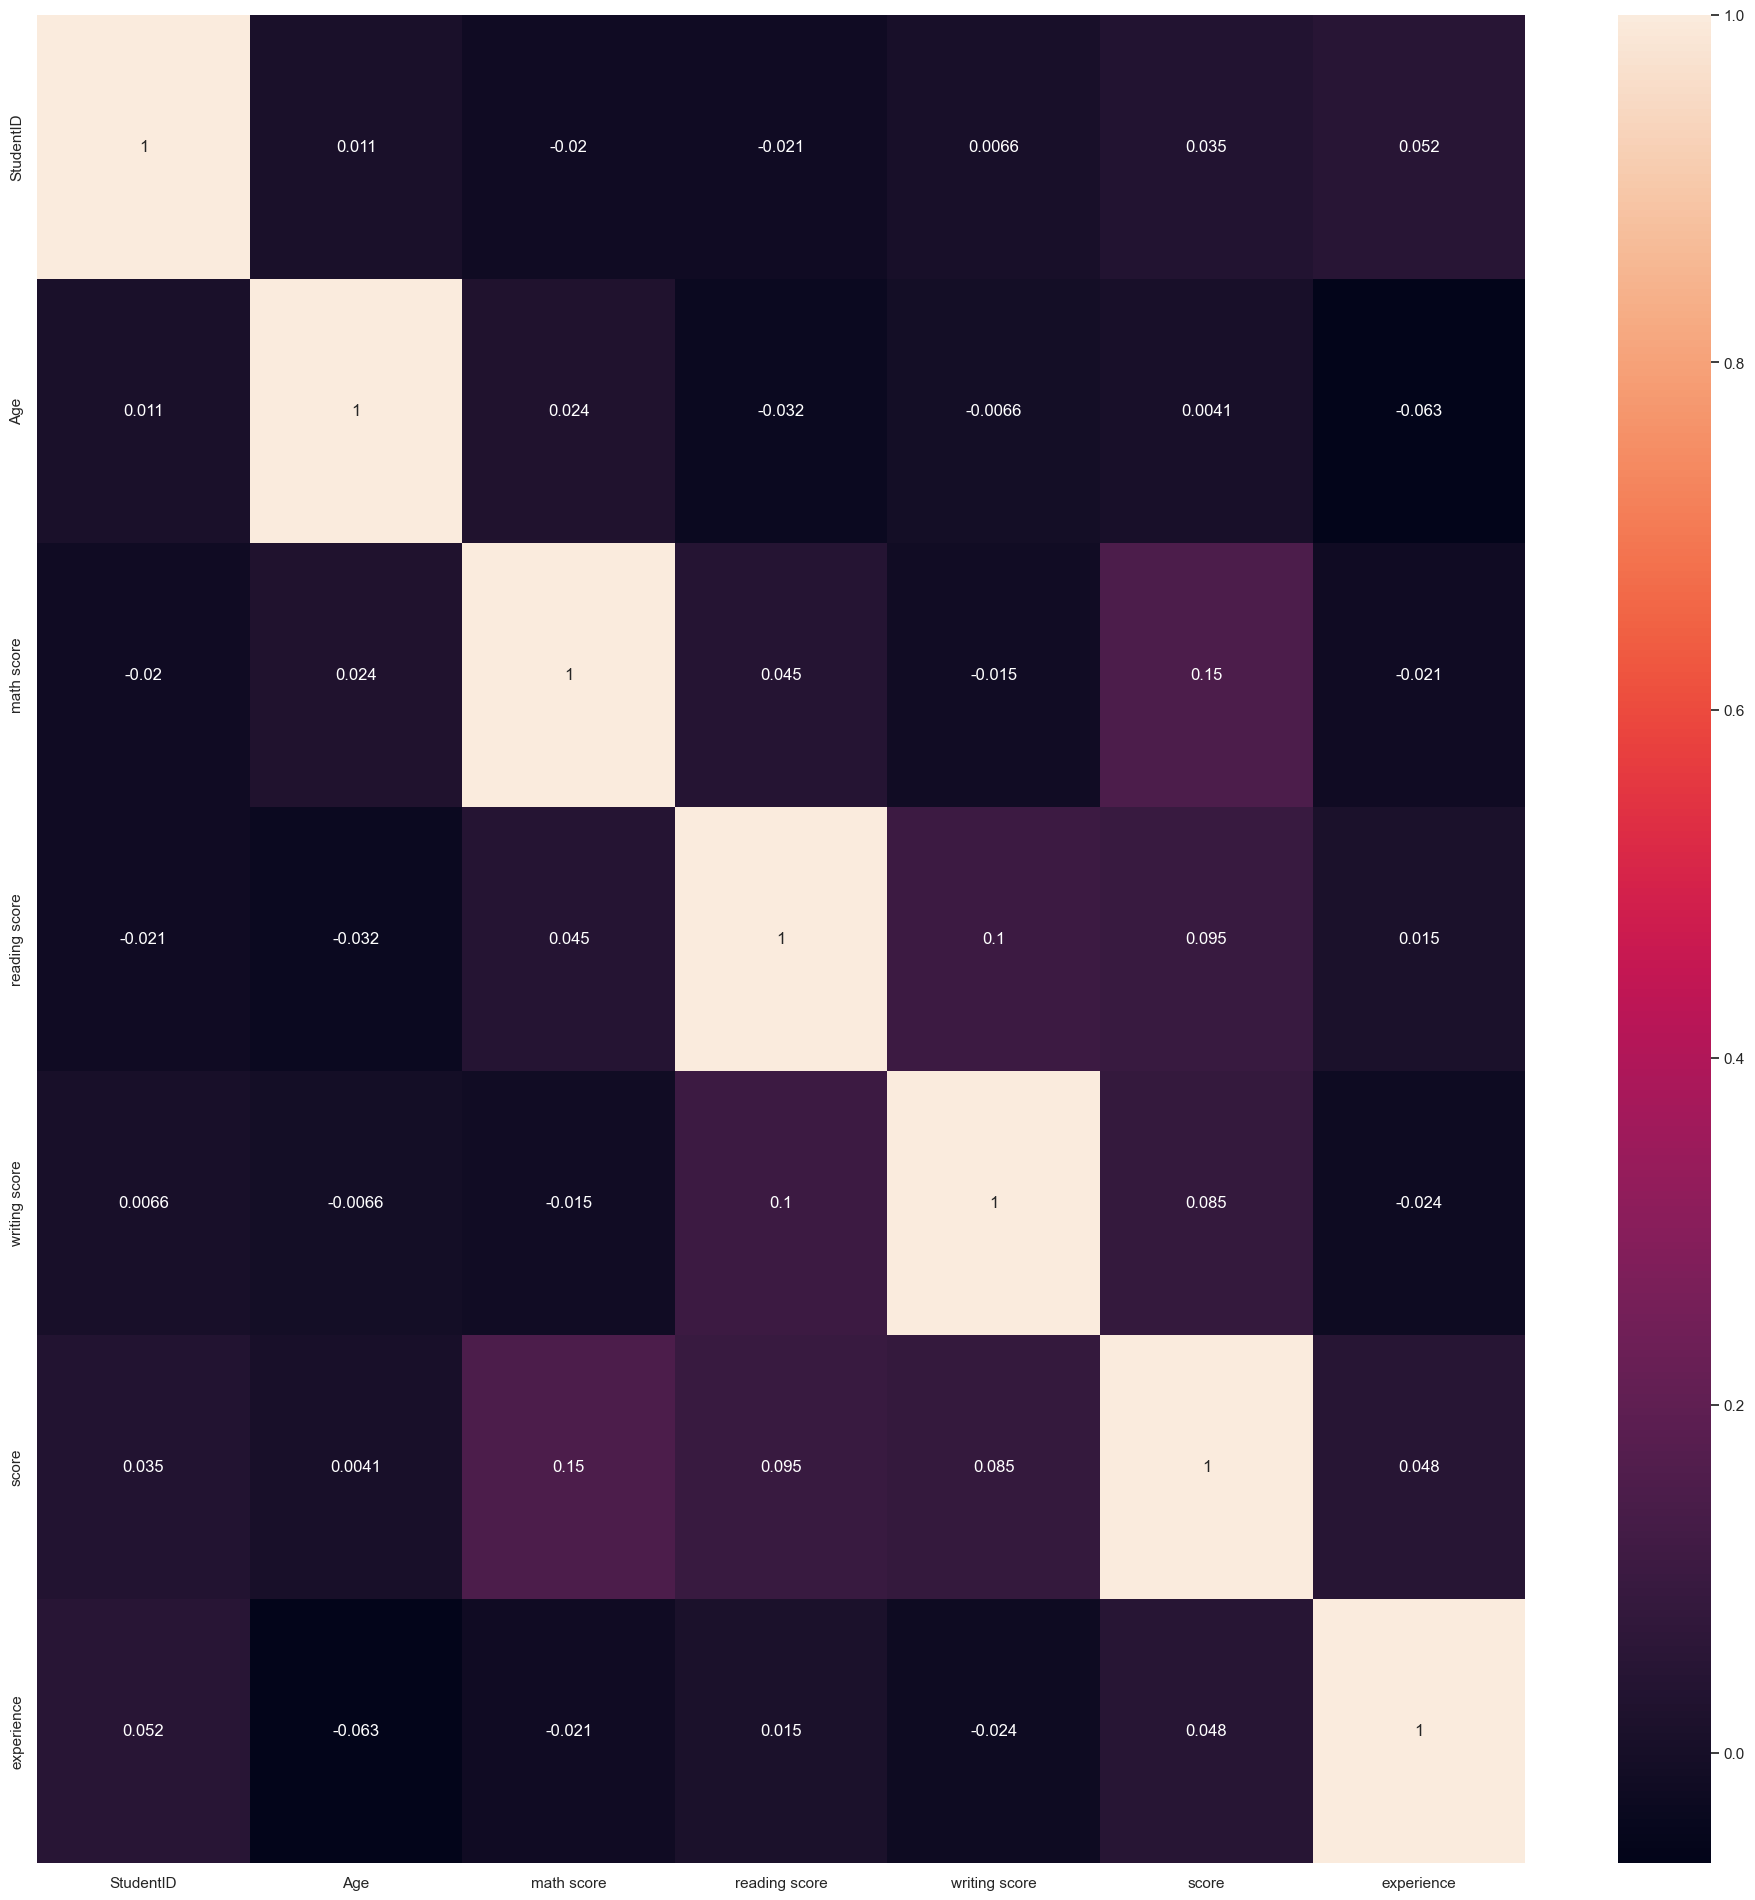

In [103]:
#finding mutual relationship or connection between two or more variables

correlation = dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



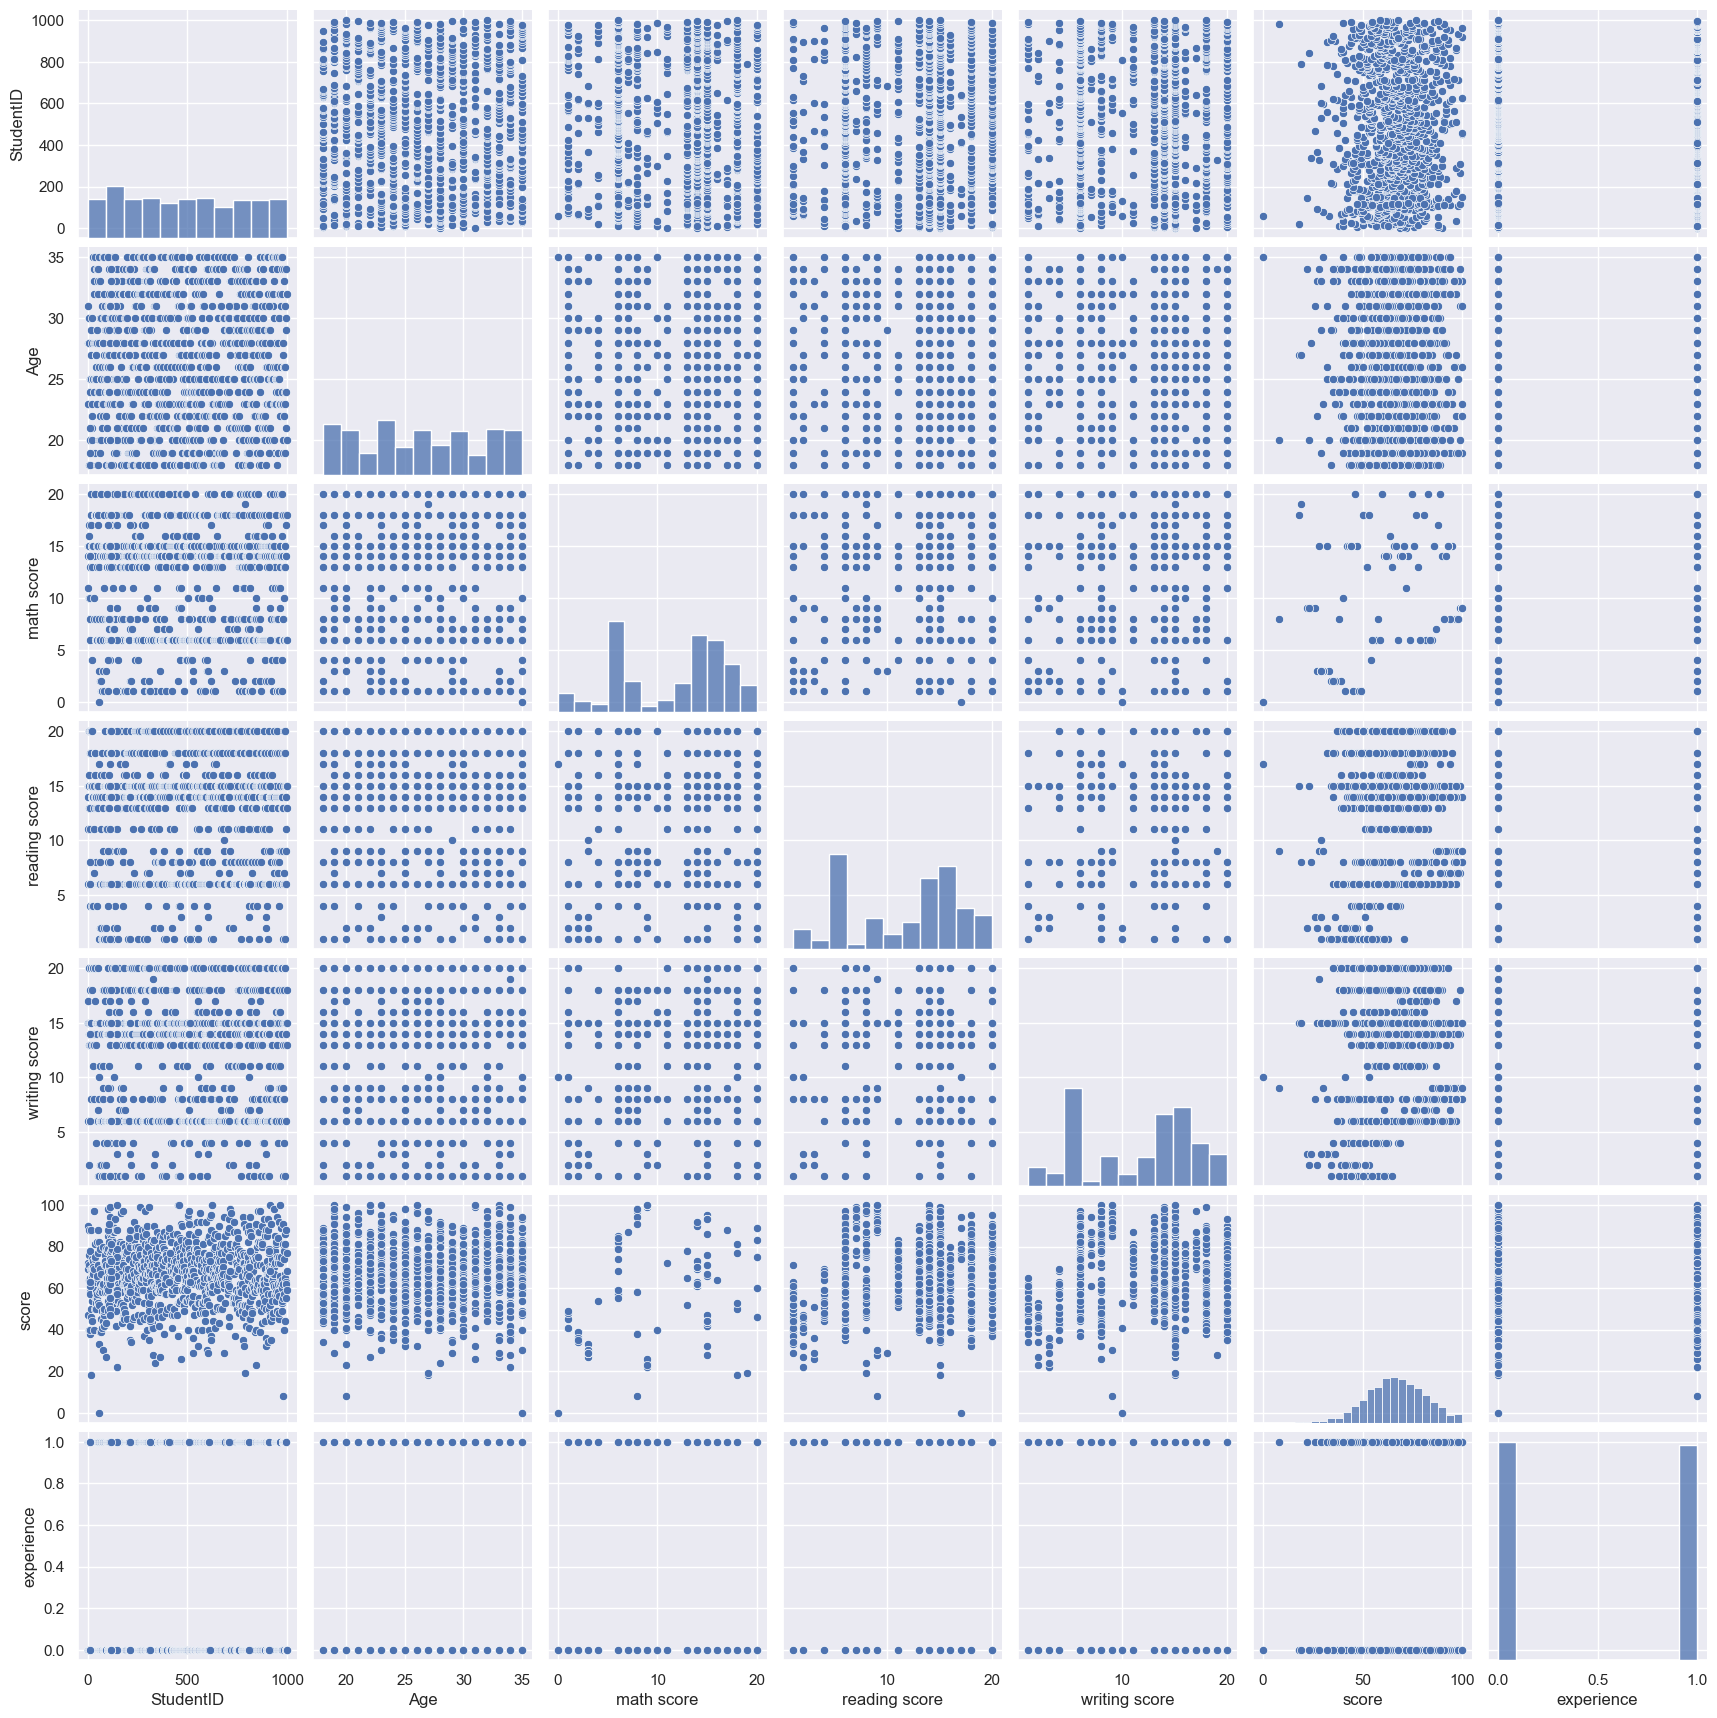

In [104]:
#Pair Plot of Scores
sns.pairplot(dataset)

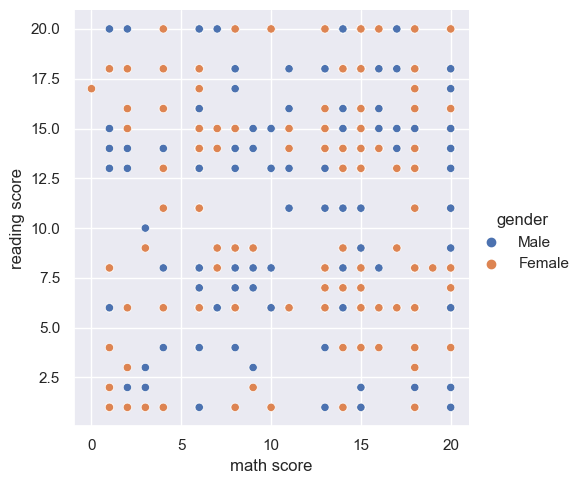

In [105]:
sns.relplot(x='math score',y='reading score',hue='gender',data=dataset)

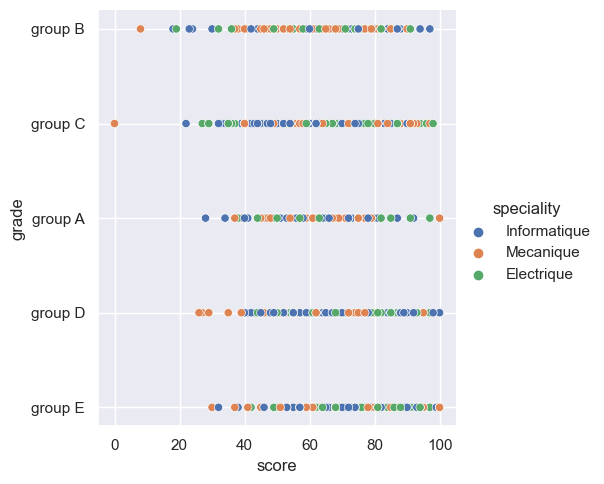

In [106]:
#nombre de specialite par grade et score 
sns.relplot(x='score',y='grade',hue='speciality',data=dataset)

In [182]:
dataset["mean score"] = ((dataset['math score'] + dataset["reading score"] + dataset["writing score"]) / 3).round()
dataset.head()

,StudentID,FirstName,lastName,email,gender,Age,grade,parental level of education,test preparation course,math score,reading score,writing score,score,speciality,experience,skills,mean score
0,1,Jeri,Drezzer,jdrezzer0@newsvine.com,Female,31,group B,bachelor's degree,none,11,11,6,72,Informatique,True,EIM,9.0
1,2,Licha,Lindgren,llindgren1@cbc.ca,Male,28,group C,some college,completed,14,14,17,69,Informatique,False,cGMP practices,15.0
2,3,Dorothy,Leglise,dleglise2@mozilla.com,Female,28,group B,master's degree,none,14,15,15,90,Mecanique,False,Event Planning,15.0
3,4,Lyda,Lippiello,llippiello3@cloudflare.com,Female,23,group A,associate's degree,none,15,6,15,47,Mecanique,True,Mecanique,12.0
4,5,Cchaddie,Orpen,corpen4@surveymonkey.com,Male,30,group C,some college,none,15,13,20,76,Mecanique,False,Solution Architecture,16.0


In [1]:
#Distribution Of Math Score
sns.distplot(dataset['score'])

NameError: name 'sns' is not defined

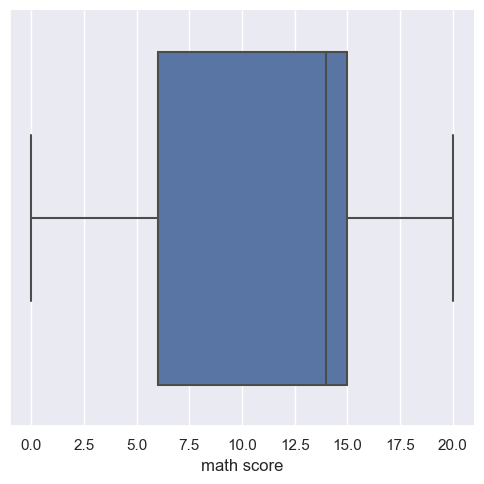

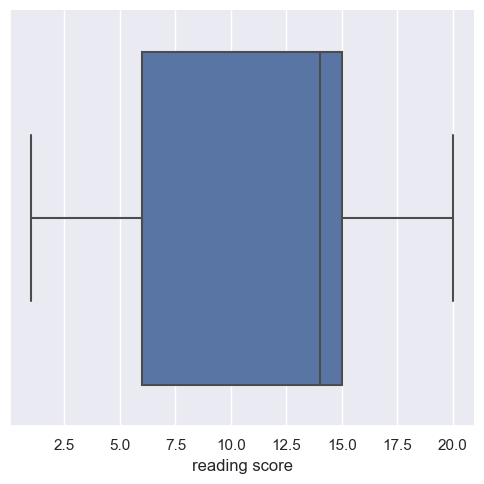

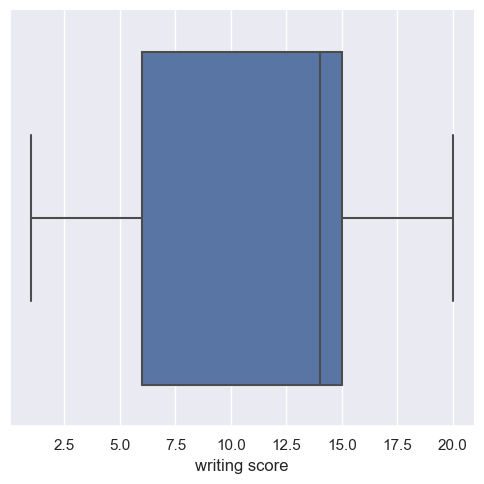

In [184]:
sns.catplot(x='math score',kind='box',data=dataset)
sns.catplot(x='reading score',kind='box',data=dataset)
sns.catplot(x='writing score',kind='box',data=dataset)

In [185]:
from sklearn.model_selection import train_test_split
y = dataset['mean score']
x = dataset.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
#Model Building with Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [187]:
model = LogisticRegression(solver='liblinear', random_state=0)


In [193]:
#Word_Cloud:

ModuleNotFoundError: No module named 'wordcloud'

In [195]:
#gestion des valeur manquante 

In [85]:
X = dataset.drop(['grade'], axis=1)
y = dataset['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [196]:
classifiers = [
   DecisionTreeClassifier(),
   RandomForestClassifier()
    ]
imputerStrategies = [
    'median','most_frequent','mean'
]
rescalers = [
    RobustScaler(),
    MinMaxScaler(),
    StandardScaler()
]

In [197]:
sc = []
for classifier in classifiers:
    for strat in imputerStrategies:
        for rescaler in rescalers:
            # Imputers + Rescaling
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy=strat)),
                ('scaler', rescaler)])
            categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])
            
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)])
            
            # Classification
            pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', classifier)])
            pipe.fit(X_train, y_train)
            # Score
            sc.append([str(classifier),strat,str(rescaler),pipe.score(X_test, y_test)])

In [199]:
scores = pd.DataFrame(sc,columns=['classifier','imputer strategy', 'rescaler', 'score'])
scores.sort_values(by=['score'],ascending=False).head()

,classifier,imputer strategy,rescaler,score
11,RandomForestClassifier(),median,StandardScaler(),0.110
16,RandomForestClassifier(),mean,MinMaxScaler(),0.105
14,RandomForestClassifier(),most_frequent,StandardScaler(),0.100
15,RandomForestClassifier(),mean,RobustScaler(),0.095
13,RandomForestClassifier(),most_frequent,MinMaxScaler(),0.095


In [ ]:
#Gestion des valeurs manquantes

In [200]:
dataset_num = dataset.drop(columns=["gender","grade","skills"])
imr = SimpleImputer(strategy="mean")
matrice = imr.fit_transform(dataset_num.values)
dataset_fitted = pd.DataFrame(matrice,columns=dataset_num.columns)
dataset_fitted = dataset_fitted.join(dataset[["REASON","JOB"]])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Jeri'

In [ ]:
print(dataset_fitted.REASON.unique(),dataset_fitted.JOB.unique())

In [ ]:
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(bank_of_america_fitted.drop(columns=["gender","grade"]))
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset_fitted.iloc[:,:-2])
pd.crosstab(dataset_fitted.iloc[:,-2],kmeans.labels_)

In [201]:
dataset_fitted.loc[(dataset_fitted["JOB"]!=dataset_fitted["JOB"]) & (np.array(kmeans.labels_) == 0), "gender"] = "femme"
dataset_fitted.loc[(dataset_fitted["JOB"]!=dataset_fitted["JOB"]) & (np.array(kmeans.labels_) == 1), "grade"] = "Informatique"

NameError: name 'dataset_fitted' is not defined

In [98]:
print(dataset_fitted.REASON.unique(),dataser_fitted.JOB.unique())

NameError: name 'dataset_fitted' is not defined

In [ ]:
#Analyse des variables

In [61]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar2 = np.zeros((p,p))
for k in range(p-1):
    corvar2[:,k] = svd.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar2**2
#contributions
ctrvar = cos2var
for k in range(p-1):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar2[:,0],'COR_D2':corvar2[:,1], 'COR_D3':corvar2[:,2],'COR_D4':corvar2[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2],'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2],'Contrib_D2':ctrvar[:,4]})


NameError: name 'eigval' is not defined

In [62]:
#corrélation de la cible avec les axes factoriels
corSupp2 = np.zeros((1,p-1))
for k in range(p-1):
    corSupp2[0,k] = np.corrcoef(y,coord2[:,k])[0,1]
corSupp2

TypeError: unsupported operand type(s) for -: 'Rectangle' and 'int'

In [125]:
dataset_final = dataset_fitted.drop(columns=["grade","gender"])

NameError: name 'dataset_fitted' is not defined

In [124]:
ss = StandardScaler()
dataset_toEncode = dataset_final#.drop(columns=["DebtCon","HomeImp","Mgr","Office","ProfExe","Sales","Self","Other"])
ssr = ss.fit_transform(bank_of_america_toEncode)
dataset_rescaled = pd.DataFrame(ssr,columns=dataset_toEncode.columns)
dataset_rescaled = dataset_rescaled.join(bank_of_america[["BAD"]])
dataset_rescaled

NameError: name 'dataset_final' is not defined

In [123]:
X = dataset_rescaled.drop('score', axis=1)
y = dataset_rescaled['score']

NameError: name 'dataset_rescaled' is not defined

In [121]:
# Calcul des composantes principales
# Le nombre de composantes (K) n’étant pas spécifié, il est par défaut égal au nombre de variables (K = p)
pca = PCA(svd_solver='full')
coord = pca.fit_transform(X)
coord

ValueError: could not convert string to float: 'Jeri'

In [120]:
X2 = pd.DataFrame(data=coord[:,0:2],columns=['ValeurPropriété','Historique'])
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

NameError: name 'coord' is not defined

In [115]:
Z = linkage(X2,'single')X
plt.figure(figsize=(12, 10))
plt.title('Classification Hiérarchique Ascendante(min)', fontsize=20)
d = dendrogram(Z)
plt.show()

SyntaxError: invalid syntax (3469784679.py, line 1)